## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Reading Data

In [2]:
df = pd.read_csv(r"D:\Work\Youth India Foundation E-School\dataset.csv", encoding="latin-1")
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [3]:
df.shape

(99989, 3)

## Null values are present or not

In [4]:
df.isnull().sum()

ItemID           0
Sentiment        0
SentimentText    0
dtype: int64

## Droping unwanted columns and renaming columns

In [5]:
df.drop(columns=["ItemID"],inplace=True)
df.rename(columns={"Sentiment": "Target", "SentimentText" : "Text"},inplace=True)
df.head()

,Target,Text
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


## Visuliazing Data

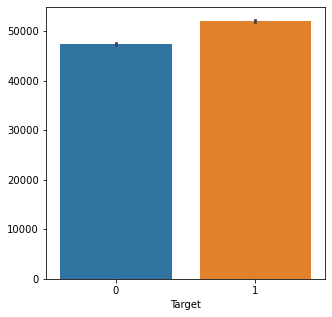

In [6]:
plt.figure(figsize=(5,5))
sns.barplot(x=df["Target"],y=df.index)
# df["Target"].value_counts()
plt.show()

## Plotting String length

<AxesSubplot:ylabel='Frequency'>

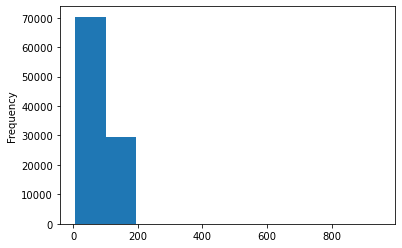

In [7]:
df["Text"].str.len().plot.hist(figsize=(6, 4))


In [8]:
df["Len"] = df["Text"].str.len()
df.head()

,Target,Text,Len
0,0,is so sad for my APL frie...,61
1,0,I missed the New Moon trail...,51
2,1,omg its already 7:30 :O,37
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,132
4,0,i think mi bf is cheating on me!!! ...,53


## Describing data

In [9]:
df.groupby("Target").describe()

Len                                                     
          count       mean        std  min   25%   50%    75%    max
Target                                                              
0       43532.0  78.445259  36.959457  6.0  48.0  75.0  110.0  949.0
1       56457.0  76.353721  35.905370  7.0  46.0  72.0  106.0  274.0

<AxesSubplot:ylabel='Frequency'>

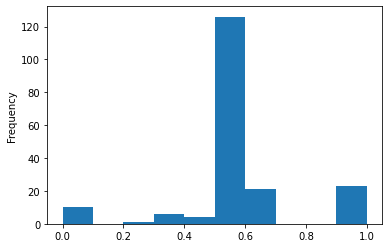

In [10]:
df.groupby("Len").mean()["Target"].plot.hist(figsize=(6, 4))


## Find occurrence of word

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words="english")
words = cv.fit_transform(df.Text)

sum_words = words.sum(axis=0)
words_freq = [(word, sum_words[0,i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x : x[1],reverse=True)

## Plotting words frequency

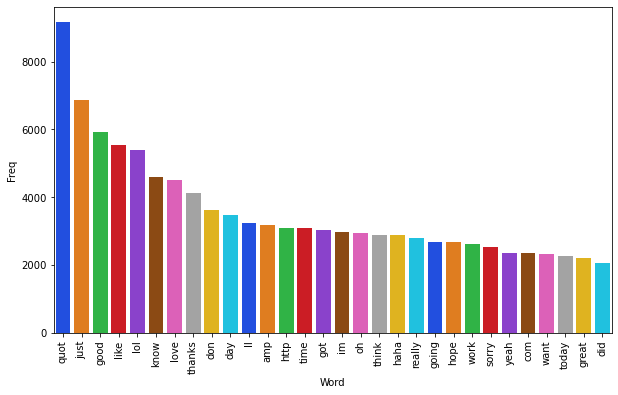

In [12]:
frequency = pd.DataFrame(words_freq,columns=["Word","Freq"]).head(30)

plt.figure(figsize=(10,6))
sns.barplot(x="Word",y="Freq",data=frequency,palette="bright")
plt.xticks(rotation=90)
plt.show()

## Making word cloud of most occurrence word

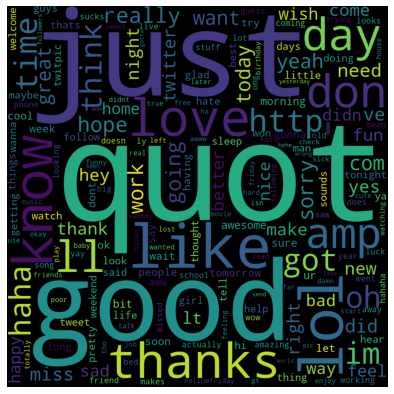

In [13]:
from wordcloud import WordCloud

wc = WordCloud(width=1000,height=1000,).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(7,7))
plt.imshow(wc)
plt.axis("off")
plt.show()


## Making word cloud of negative words

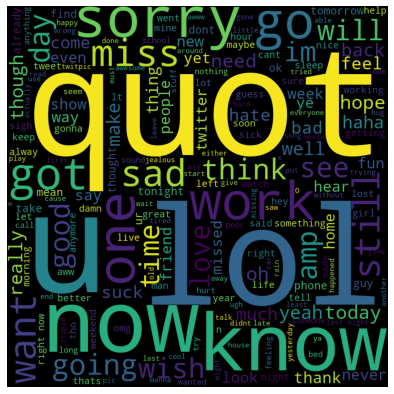

In [14]:
neg_words = " ".join([text for text in df["Text"][df["Target"] == 0]])

neg_wc = WordCloud(width=800,height=800).generate(neg_words)

plt.figure(figsize=(7,7))
plt.imshow(neg_wc)
plt.axis("off")
plt.show()



## Making word cloud for positive words

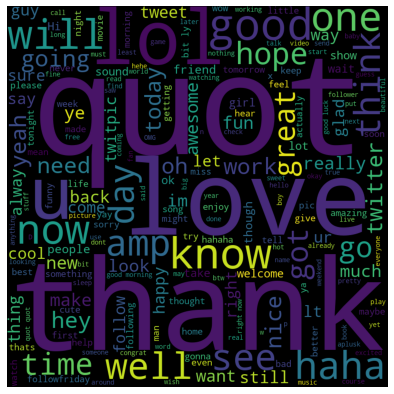

In [15]:
pos_words = " ".join([text for text in df["Text"][df["Target"] == 1]])

pos_wc = WordCloud(width=800, height=800).generate(pos_words)

plt.figure(figsize=(7, 7))
plt.imshow(pos_wc)
plt.axis("off")
plt.show()


In [16]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import string
from nltk.tokenize import word_tokenize


## Cleaning the Text

In [17]:
text_corpus = []

for i in range(0,len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df["Text"][i])
    review = review.lower()
    review = review.split()

    ps = PorterStemmer()

    review = [ps.stem(word) for word in review if not word in set(stopwords.words("english"))]
    review = " ".join(review)

    text_corpus.append(review)

## Apply count vectorizer and choosing dependent and independent data

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(text_corpus).toarray()
y = df.iloc[:,0]

## Spliting data into train test split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Applying Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_predict_rf = rf.predict(X_test)
print("Training Accuracy :", rf.score(X_train, y_train))
print("Validation Accuracy :", rf.score(X_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_predict_rf))

# confusion matrix
cm = confusion_matrix(y_test, y_predict_rf)
print(cm)

print("Accuracy is ",accuracy_score(y_test, y_predict_rf))


Training Accuracy : 0.977422460026753
Validation Accuracy : 0.7191219121912191
F1 score : 0.7551118280507476
[[5721 3039]
 [2578 8660]]
Accuracy is  0.7191219121912191


## Applying Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_predict_lr = rf.predict(X_test)
print("Training Accuracy :", lr.score(X_train, y_train))
print("Validation Accuracy :", lr.score(X_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_predict_lr))

# confusion matrix
cm = confusion_matrix(y_test, y_predict_lr)
print(cm)

print("Accuracy is ", accuracy_score(y_test, y_predict_lr))


Training Accuracy : 0.7613106474478378
Validation Accuracy : 0.7366236623662367
F1 score : 0.7551118280507476
[[5721 3039]
 [2578 8660]]
Accuracy is  0.7191219121912191


## Applying Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_predict_dt = dt.predict(X_test)
print("Training Accuracy :", dt.score(X_train, y_train))
print("Validation Accuracy :", dt.score(X_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_predict_dt))

# confusion matrix
cm = confusion_matrix(y_test, y_predict_dt)
print(cm)

print("Accuracy is ", accuracy_score(y_test, y_predict_dt))


Training Accuracy : 0.977422460026753
Validation Accuracy : 0.6715671567156716
F1 score : 0.7068118917953755
[[5513 3247]
 [3321 7917]]
Accuracy is  0.6715671567156716


## Applying SVC

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_predict_svc = svc.predict(X_test)
print("Training Accuracy :", svc.score(X_train, y_train))
print("Validation Accuracy :", svc.score(X_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_predict_svc))

# confusion matrix
cm = confusion_matrix(y_test, y_predict_svc)
print(cm)

print("Accuracy is ", accuracy_score(y_test, y_predict_svc))


## Applying XGBoost

In [27]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)

y_predict_xgb = xgb.predict(X_test)
print("Training Accuracy :", xgb.score(X_train, y_train))
print("Validation Accuracy :", xgb.score(X_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_predict_xgb))

# confusion matrix
cm = confusion_matrix(y_test, y_predict_xgb)
print(cm)

print("Accuracy is ", accuracy_score(y_test, y_predict_xgb))


[21:05:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy : 0.7439086897275944
Validation Accuracy : 0.7202220222022202
F1 score : 0.7775259453656209
[[4626 4134]
 [1461 9777]]
Accuracy is  0.7202220222022202
